In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df = df.drop(['Cabin'], axis=1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
median1 = df['Age'].median()
median1

28.0

In [11]:
df['Age'].replace(np.nan, median1, inplace = True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
mode1 = df['Embarked'].mode().values[0]
mode1

'S'

In [14]:
df['Embarked'].replace(np.nan, mode1, inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'])

In [18]:
df.sample(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
569,570,1,"Jonsson, Mr. Carl",32.0,0,0,350417,7.8542,0,1,0,0,1,0,0,1
147,148,0,"Ford, Miss. Robina Maggie ""Ruby""",9.0,2,2,W./C. 6608,34.3750,1,0,0,0,1,0,0,1
777,778,1,"Emanuel, Miss. Virginia Ethel",5.0,0,0,364516,12.4750,1,0,0,0,1,0,0,1
431,432,1,"Thorneycroft, Mrs. Percival (Florence Kate White)",28.0,1,0,376564,16.1000,1,0,0,0,1,0,0,1
822,823,0,"Reuchlin, Jonkheer. John George",38.0,0,0,19972,0.0000,0,1,0,0,1,1,0,0


In [19]:
df.drop(["Name", "Ticket", "Fare", "PassengerId", ],axis=1,inplace=True)

In [20]:
df.sample(5)

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
887,1,19.0,0,0,1,0,0,0,1,1,0,0
694,0,60.0,0,0,0,1,0,0,1,1,0,0
529,0,23.0,2,1,0,1,0,0,1,0,1,0
546,1,19.0,1,0,1,0,0,0,1,0,1,0
196,0,28.0,0,0,0,1,0,1,0,0,0,1


In [21]:
X = df.drop(['Survived'], axis = 1)
y = df[['Survived']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
y_train.shape

(623, 1)

In [25]:
model_1.score(X_train, y_train)

0.7849117174959872

In [26]:
model_1.score(X_test, y_test)

0.8134328358208955

In [27]:
from sklearn import metrics

In [28]:
predictions = model_1.predict(X_test)

In [29]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       163
           1       0.74      0.80      0.77       105

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.81      0.81       268



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, predictions)

array([[134,  29],
       [ 21,  84]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.82      0.84       163\n           1       0.74      0.80      0.77       105\n\n    accuracy                           0.81       268\n   macro avg       0.80      0.81      0.81       268\nweighted avg       0.82      0.81      0.81       268\n'

<AxesSubplot: >

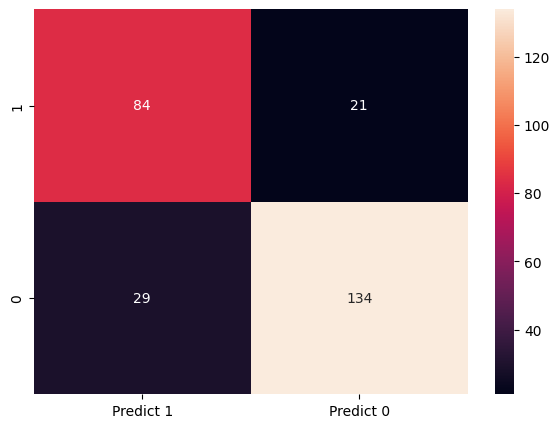

In [33]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')


## SVC

In [34]:
from sklearn.svm import SVC

In [35]:
model_2 = SVC(kernel='linear')

In [36]:
model_2.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [37]:
model_2.score(X_train, y_train)

0.7849117174959872

In [38]:
model_2.score(X_test, y_test)

0.7910447761194029

## DecisionTree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_3 = DecisionTreeClassifier()

In [43]:
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
model_3.score(X_train, y_train)

0.9406099518459069

In [46]:
model_3.score(X_test, y_test)

0.7835820895522388

In [47]:
model_3_opt = DecisionTreeClassifier(max_depth = 3)

In [48]:
model_3_opt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
model_3_opt.score(X_train, y_train)

0.8298555377207063

In [50]:
model_3_opt.score(X_test, y_test)

0.8246268656716418

## SVC

In [51]:
from sklearn.svm import SVC

In [52]:
model_4 = SVC()

In [53]:
model_4.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [54]:
model_4.score(X_train, y_train)

0.6452648475120385

In [55]:
model_4.score(X_test, y_test)

0.6194029850746269

In [57]:
model_4_opt = SVC(kernel='linear')

In [59]:
model_4_opt.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [60]:
model_4_opt.score(X_train, y_train)

0.7849117174959872

In [61]:
model_4_opt.score(X_test, y_test)

0.7910447761194029

## Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier

In [63]:
model_5 = BaggingClassifier()

In [64]:
model_5.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [65]:
model_5.score(X_train, y_train)

0.9213483146067416

In [66]:
model_5.score(X_test, y_test)

0.8208955223880597

In [84]:
model_6_opt = BaggingClassifier(base_estimator = model_3_opt,n_estimators = 50)

In [85]:
model_6_opt.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=50)

In [86]:
model_6_opt.score(X_train, y_train)

0.8298555377207063

In [87]:
model_6_opt.score(X_test, y_test)

0.8246268656716418

## Ada Boosting

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
model_7 = AdaBoostClassifier()

In [90]:
model_7.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [91]:
model_7.score(X_train, y_train)

0.8202247191011236

In [92]:
model_7.score(X_test, y_test)

0.8283582089552238

## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
model_8 = GradientBoostingClassifier()

In [95]:
model_8.fit(X_train, y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [96]:
model_8.score(X_train, y_train)

0.8683788121990369

In [97]:
model_8.score(X_test, y_test)

0.8134328358208955

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model_9 = RandomForestClassifier()

In [100]:
model_9.fit(X_train, y_train)

C:\Users\91768\AppData\Local\Temp\ipykernel_18060\2028610257.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_9.fit(X_train, y_train)


RandomForestClassifier()

In [102]:
model_9.score(X_train, y_train)

0.9406099518459069

In [103]:
model_9.score(X_test, y_test)

0.7947761194029851

In [112]:
model_9_opt = RandomForestClassifier(max_features = 5, max_depth = 3, n_estimators = 50)

In [113]:
model_9_opt.fit(X_train, y_train)

C:\Users\91768\AppData\Local\Temp\ipykernel_18060\2335322823.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_9_opt.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, max_features=5, n_estimators=50)

In [114]:
model_9_opt.score(X_train, y_train)

0.8346709470304976

In [115]:
model_9_opt.score(X_test, y_test)

0.832089552238806